In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("bank.txt", sep=';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
col_list=[data.columns]

In [5]:
col_list

[Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y'],
       dtype='object')]

In [6]:
data.shape

(4521, 17)

In [7]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
print(data.describe(include='all'))


                age         job  marital  education default       balance  \
count   4521.000000        4521     4521       4521    4521   4521.000000   
unique          NaN          12        3          4       2           NaN   
top             NaN  management  married  secondary      no           NaN   
freq            NaN         969     2797       2306    4445           NaN   
mean      41.170095         NaN      NaN        NaN     NaN   1422.657819   
std       10.576211         NaN      NaN        NaN     NaN   3009.638142   
min       19.000000         NaN      NaN        NaN     NaN  -3313.000000   
25%       33.000000         NaN      NaN        NaN     NaN     69.000000   
50%       39.000000         NaN      NaN        NaN     NaN    444.000000   
75%       49.000000         NaN      NaN        NaN     NaN   1480.000000   
max       87.000000         NaN      NaN        NaN     NaN  71188.000000   

       housing  loan   contact          day month     duration     campaign

In [9]:
data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [10]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
data['y']=data['y'].map(lambda x: 1 if x=='yes' else 0)

In [12]:
data['y']

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [13]:
target=data['y']

In [14]:
data.drop('y',axis=1,inplace=True)

In [15]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [16]:
target

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [17]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [18]:
data_c=data.select_dtypes(include=['object'])
print(data_c.columns)
data_c

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


,job,marital,education,default,housing,loan,contact,month,poutcome
0,unemployed,married,primary,no,no,no,cellular,oct,unknown
1,services,married,secondary,no,yes,yes,cellular,may,failure
2,management,single,tertiary,no,yes,no,cellular,apr,failure
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown
4518,technician,married,secondary,no,no,no,cellular,aug,unknown
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other


In [19]:
categorical_Attributes = data.select_dtypes(include=['object']).columns
categorical_Attributes

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [20]:
data = pd.get_dummies(columns=categorical_Attributes, data=data, prefix=categorical_Attributes, prefix_sep="_", drop_first=False)
print (data.columns, data.shape)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object') (4521, 51)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25,random_state=123)

In [22]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier(random_state=42)

rfe_DT=RFE(DT,n_features_to_select=20,verbose=21)

rfe_DT.fit(X_train,y_train)

names=X_train.columns.tolist()

b=rfe_DT.ranking_

#RFE: Recursive Feature Elimination is corresponding to Machine Learning Model.
#ranking is a attribute

a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])

#a.to_csv('feature_selection.csv')

RFE_selected=a['features'][a['rank']==1]

RFE_selected

Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 fe

0                  age
1              balance
2             campaign
3     contact_cellular
4      contact_unknown
5                  day
6             duration
7      job_blue-collar
8       job_technician
9      marital_married
10           month_apr
11           month_aug
12           month_jun
13           month_mar
14           month_may
15           month_nov
16           month_oct
17               pdays
18    poutcome_success
19            previous
Name: features, dtype: object

In [23]:
X_train=X_train[RFE_selected]
X_test=X_test[RFE_selected]

DecisionTreeClassifier()

In [25]:
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression(random_state=10)
clf_LR.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [26]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)

[[2992    0]
 [   0  398]]


In [28]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[932  76]
 [ 61  62]]


In [29]:
#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  1.0
Train TPR:  1.0
Train Accuracy:  1.0


In [30]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9246031746031746
Test TPR:  0.5040650406504065
Test Accuracy:  0.878868258178603


In [31]:
import matplotlib.pyplot as plt
clf.feature_importances_
df_imp=pd.DataFrame({'features':X_train.columns,'imortances':clf.feature_importances_})

df_imp=df_imp.sort_values(by='imortances',ascending=False)

df_imp

,features,imortances
6,duration,0.293633
1,balance,0.143527
5,day,0.092537
18,poutcome_success,0.085392
0,age,0.083904
17,pdays,0.058899
2,campaign,0.041810
16,month_oct,0.026064
19,previous,0.023575
8,job_technician,0.022793


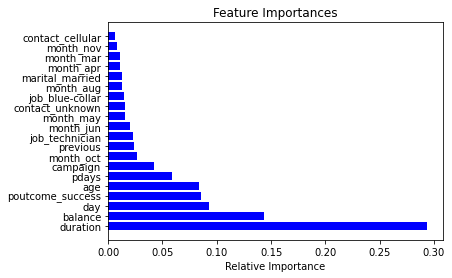

In [32]:
#Ploting the Feature importances
plt.title('Feature Importances')
plt.barh(df_imp['features'], df_imp['imortances'], color='blue')
plt.yticks(df_imp['features'])
plt.xlabel('Relative Importance')
plt.show()

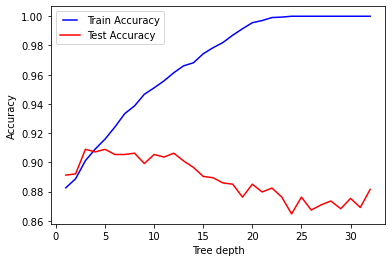

In [33]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

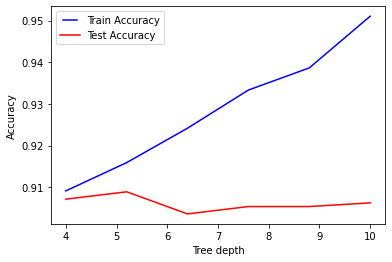

In [34]:
max_depths = np.linspace(4, 10, 6, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

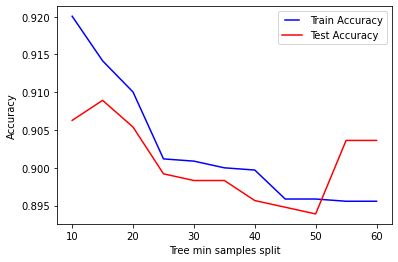

In [35]:
min_samples_leafs=[10,15,20,25,30,35,40,45,50,55,60]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples split')
plt.show()

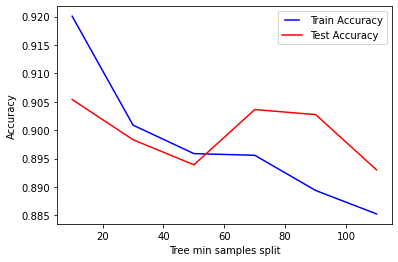

In [37]:

min_samples_leafs=[10,30,50,70,90,110]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples split')
plt.show()

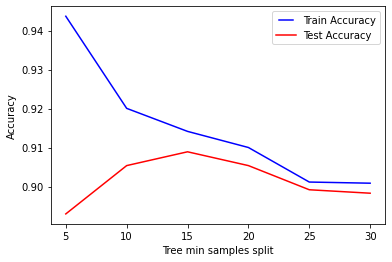

In [38]:
min_samples_leafs=[5,10,15,20,25,30]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples split')
plt.show()

In [39]:
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 4,5,6,7,8,9,10],
              "min_samples_leaf": [5, 10,15,20],
              "max_leaf_nodes": [None, 50, 60, 70],
              }

In [42]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier() #estimator
clf2 = GridSearchCV(dt, param_grid, cv=3)
clf2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [None, 50, 60, 70],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [2, 10, 20]})

In [43]:
clf2.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=20)

In [45]:
#Building a Basic Decision Tree Model

#default decision tree algorithm
clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=20)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=20)

In [46]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [47]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)

[[2945   47]
 [ 234  164]]


In [48]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[985  23]
 [ 80  43]]


In [49]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9842914438502673
Train TPR:  0.4120603015075377
Train Accuracy:  0.9171091445427728


In [50]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9771825396825397
Test TPR:  0.34959349593495936
Test Accuracy:  0.9089301503094607


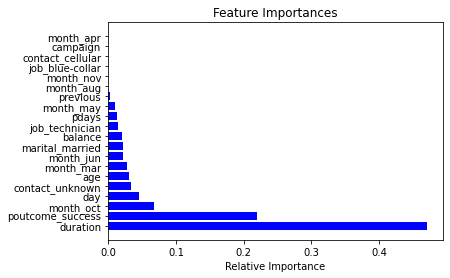

In [51]:
import matplotlib.pyplot as plt
clf.feature_importances_
df_imp=pd.DataFrame({'features':X_train.columns,'imortances':clf.feature_importances_})

df_imp=df_imp.sort_values(by='imortances',ascending=False)

df_imp
plt.title('Feature Importances')
plt.barh(df_imp['features'], df_imp['imortances'], color='blue')
plt.yticks(df_imp['features'])
plt.xlabel('Relative Importance')
plt.show()

In [73]:
def get_predictions(X_train,y_train):
    y_train_pred_final = pd.DataFrame({'TermDeposit_Subscription':y_train.values, 'TermDeposit_Subscription_Prob':clf2.predict_proba(X_train)[:,1]})
    y_train_pred_final['Cust_ID'] = y_train.index
    y_train_pred_final = y_train_pred_final.reindex(['Cust_ID','TermDeposit_Subscription','TermDeposit_Subscription_Prob'], axis=1)
    y_train_pred_final['predicted'] = y_train_pred_final.TermDeposit_Subscription_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final
    
y_train_pred_final=get_predictions(X_train,y_train)    
# Let's see the head
y_train_pred_final.head()


,Cust_ID,TermDeposit_Subscription,TermDeposit_Subscription_Prob,predicted
0,1448,0,0.027375,0
1,242,0,0.027375,0
2,3859,0,0.027375,0
3,1698,1,0.117381,0
4,1244,0,0.117381,0


In [74]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute the confusion matrix
cm = confusion_matrix(y_train_pred_final['TermDeposit_Subscription'], y_train_pred_final['predicted'])

# Compute accuracy, recall, precision, FPR, and specificity
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
fpr = fp / (fp + tn)
specificity = tn / (tn + fp)

# Print the results
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("False Positive Rate (FPR):", fpr)
print("Specificity:", specificity)


Confusion Matrix:
 [[2945   47]
 [ 234  164]]
Accuracy: 0.9171091445427728
Recall: 0.4120603015075377
Precision: 0.7772511848341233
False Positive Rate (FPR): 0.01570855614973262
Specificity: 0.9842914438502673


In [75]:
def generate_model_result_proba(y_train,predicted):
    confusion = confusion_matrix(y_train, predicted )
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}
    
    return result_df
    
result_df_train=generate_model_result_proba(y_train,y_train_pred_final['predicted'])

In [76]:
def get_predictions(X_test, y_test):
    y_test_pred_final = pd.DataFrame({'TermDeposit_Subscription': y_test.values, 'TermDeposit_Subscription_Prob': clf2.predict_proba(X_test)[:,1]})
    y_test_pred_final['Cust_ID'] = y_test.index
    y_test_pred_final = y_test_pred_final.reindex(['Cust_ID', 'TermDeposit_Subscription', 'TermDeposit_Subscription_Prob'], axis=1)
    y_test_pred_final['predicted'] = y_test_pred_final.TermDeposit_Subscription_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_test_pred_final

y_test_pred_final = get_predictions(X_test, y_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test_pred_final['TermDeposit_Subscription'], y_test_pred_final['predicted'])

# Compute accuracy, recall, precision, FPR, and specificity
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
fpr = fp / (fp + tn)
specificity = tn / (tn + fp)

# Print the results
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("False Positive Rate (FPR):", fpr)
print("Specificity:", specificity)


Confusion Matrix:
 [[985  23]
 [ 80  43]]
Accuracy: 0.9089301503094607
Recall: 0.34959349593495936
Precision: 0.6515151515151515
False Positive Rate (FPR): 0.022817460317460316
Specificity: 0.9771825396825397


In [78]:
def generate_model_result_proba(y_test, predicted):
    confusion = confusion_matrix(y_test, predicted)
    TP = confusion[1, 1]  # true positive
    TN = confusion[0, 0]  # true negatives
    FP = confusion[0, 1]  # false positives
    FN = confusion[1, 0]  # false negatives
    result_df = {'accuracy': round((TP + TN) / float(TN + FP + TP + FN), 3),
                 'recall': round((TP) / float(TP + FN), 3),
                 'precision': round((TP) / float(TP + FP), 3),
                 'FPR': round((FP) / float(TN + FP), 3),
                 'specificity': round((TN) / float(TN + FP), 3)}
    
    return result_df

result_df_test = generate_model_result_proba(y_test, y_test_pred_final['predicted'])
result_df_test

{'accuracy': 0.909,
 'recall': 0.35,
 'precision': 0.652,
 'FPR': 0.023,
 'specificity': 0.977}

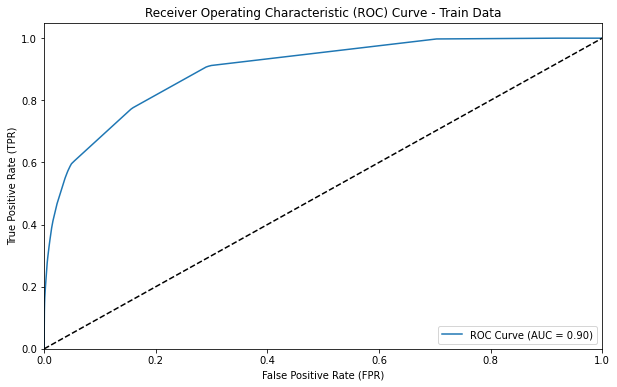

0.898310066374654


In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_train_pred_final['TermDeposit_Subscription'], y_train_pred_final['TermDeposit_Subscription_Prob'])

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Train Data')
plt.legend(loc="lower right")
plt.show()
print(roc_auc)

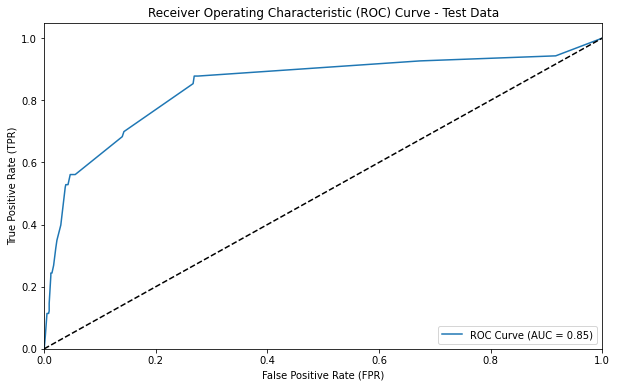

auc: 0.8462341915085818


In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test_pred_final['TermDeposit_Subscription'], y_test_pred_final['TermDeposit_Subscription_Prob'])

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()
print('auc:',roc_auc)

In [93]:
y_test_pred_final

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.TermDeposit_Subscription_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

,Cust_ID,TermDeposit_Subscription,TermDeposit_Subscription_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,2982,0,0.000000,0,0,0,0,0,0,0,0,0,0,0
1,276,0,0.000000,0,0,0,0,0,0,0,0,0,0,0
2,4132,0,0.179348,0,1,1,0,0,0,0,0,0,0,0
3,511,0,0.432432,0,1,1,1,1,1,0,0,0,0,0
4,2061,0,0.027375,0,1,0,0,0,0,0,0,0,0,0


     threshold  accuracy     sensi     speci
0.0        0.0  0.176835  0.943089  0.083333
0.1        0.1  0.746242  0.853659  0.733135
0.2        0.2  0.907162  0.560976  0.949405
0.3        0.3  0.910698  0.560976  0.953373
0.4        0.4  0.914235  0.520325  0.962302
0.5        0.5  0.908930  0.349593  0.977183
0.6        0.6  0.908046  0.325203  0.979167
0.7        0.7  0.906278  0.235772  0.988095
0.8        0.8  0.896552  0.113821  0.992063
0.9        0.9  0.897436  0.113821  0.993056


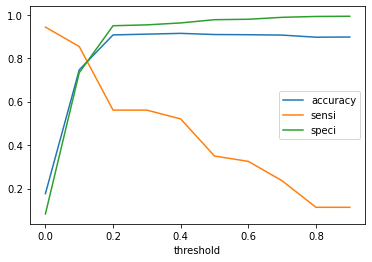

In [95]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_test_pred_final.TermDeposit_Subscription, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='threshold', y=['accuracy','sensi','speci'])
plt.show()

In [96]:
# Set the optimal threshold
optimal_threshold = 0.14

# Apply the optimal threshold to the train data
y_train_pred_final['predicted_optimal'] = y_train_pred_final['TermDeposit_Subscription_Prob'].apply(lambda x: 1 if x > optimal_threshold else 0)

# Calculate the confusion matrix for the train data
train_cm = confusion_matrix(y_train_pred_final['TermDeposit_Subscription'], y_train_pred_final['predicted_optimal'])
train_total = sum(sum(train_cm))
train_accuracy = (train_cm[0, 0] + train_cm[1, 1]) / train_total
train_sensitivity = train_cm[1, 1] / (train_cm[1, 0] + train_cm[1, 1])
train_specificity = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1])

# Print the evaluation metrics for the train data
print("Train Data:")
print("Accuracy:", train_accuracy)
print("Sensitivity:", train_sensitivity)
print("Specificity:", train_specificity)



Train Data:
Accuracy: 0.8330383480825959
Sensitivity: 0.7763819095477387
Specificity: 0.8405748663101604


In [97]:
# Apply the optimal threshold to the test data
y_test_pred_final['predicted_optimal'] = y_test_pred_final['TermDeposit_Subscription_Prob'].apply(lambda x: 1 if x > optimal_threshold else 0)

# Calculate the confusion matrix for the test data
test_cm = confusion_matrix(y_test_pred_final['TermDeposit_Subscription'], y_test_pred_final['predicted_optimal'])
test_total = sum(sum(test_cm))
test_accuracy = (test_cm[0, 0] + test_cm[1, 1]) / test_total
test_sensitivity = test_cm[1, 1] / (test_cm[1, 0] + test_cm[1, 1])
test_specificity = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1])

# Print the evaluation metrics for the test data
print("\nTest Data:")
print("Accuracy:", test_accuracy)
print("Sensitivity:", test_sensitivity)
print("Specificity:", test_specificity)



Test Data:
Accuracy: 0.8399646330680813
Sensitivity: 0.6991869918699187
Specificity: 0.8571428571428571


In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.TermDeposit_Subscription_Prob.map( lambda x: 1 if x > 0.13 else 0)

y_train_pred_final.head()

,Cust_ID,TermDeposit_Subscription,TermDeposit_Subscription_Prob,predicted,final_predicted
0,1448,0,0.027375,0,0
1,242,0,0.027375,0,0
2,3859,0,0.027375,0,0
3,1698,1,0.117381,0,0
4,1244,0,0.117381,0,0


In [104]:
result_df_train_013=generate_model_result_proba(y_train,y_train_pred_final['final_predicted'])
result_df_train_013

{'accuracy': 0.833,
 'recall': 0.776,
 'precision': 0.393,
 'FPR': 0.159,
 'specificity': 0.841}

In [102]:
y_test_pred_final['final_predicted'] = y_test_pred_final.TermDeposit_Subscription_Prob.map( lambda x: 1 if x > 0.13 else 0)

y_test_pred_final.head()

,Cust_ID,TermDeposit_Subscription,TermDeposit_Subscription_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_optimal,final_predicted
0,2982,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0
1,276,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4132,0,0.179348,0,1,1,0,0,0,0,0,0,0,0,1,1
3,511,0,0.432432,0,1,1,1,1,1,0,0,0,0,0,1,1
4,2061,0,0.027375,0,1,0,0,0,0,0,0,0,0,0,0,0


In [105]:
result_df_test_013=generate_model_result_proba(y_test,y_test_pred_final['final_predicted'])
result_df_test_013

{'accuracy': 0.84,
 'recall': 0.699,
 'precision': 0.374,
 'FPR': 0.143,
 'specificity': 0.857}